## Partie 0 - Installation des packages python

In [ ]:
%pip install -r requirements.txt

## Partie I - Détection de la langue

Importation des libraries

In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import os
import pickle

Lecture du fichier csv d'entraînement

In [2]:
df = pd.read_csv('Language Detection.csv')
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


Récupération des colonnes

In [3]:
X = df['Text']
Y = df['Language']

Nettoyage des données

In [4]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

C:\Users\antho\AppData\Local\Temp\ipykernel_10292\799335934.py:4: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', ' ', text)


Vectorisation du dataframe et entraînement

In [5]:
vertorizer = CountVectorizer()
le = LabelEncoder()
Y = le.fit_transform(Y)
X = vertorizer.fit_transform(data_list).toarray()
X.shape

(10337, 39404)

Création du model

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

model = MultinomialNB()
model.fit(X_train, Y_train)

MultinomialNB()

Récupération du score du model

In [7]:
model.score(X_train, Y_train)

0.9921310629514963

Récupération du score de la précision du model

In [8]:
y_pred = model.predict(X_test)
accuracy_score(Y_test, y_pred)

0.9818181818181818

Test du model

In [9]:
a = ["Ich"]
X = vertorizer.transform(a)
prediction = model.predict(X)
le.inverse_transform(prediction)[0]

'German'

Enregistrement du model, vectoriseur et label

In [10]:
if os.path.exists("./models") == False:
    os.mkdir("models")
    pass

pickle.dump(model, open("./models/model.pickle", "wb"))
pickle.dump(vertorizer, open("./models/vectorizer.pickle", "wb"))
pickle.dump(le, open("./models/label.pickle", "wb"))

## Partie II - Les graphiques

Importation des librairies

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Création de la matrice de confusion

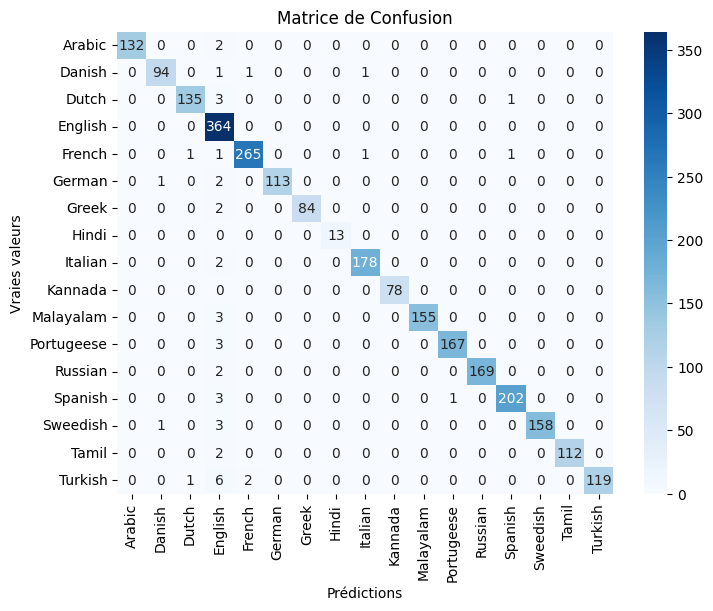

In [12]:
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de Confusion")
plt.show()

Graphique sur la distribution des langues

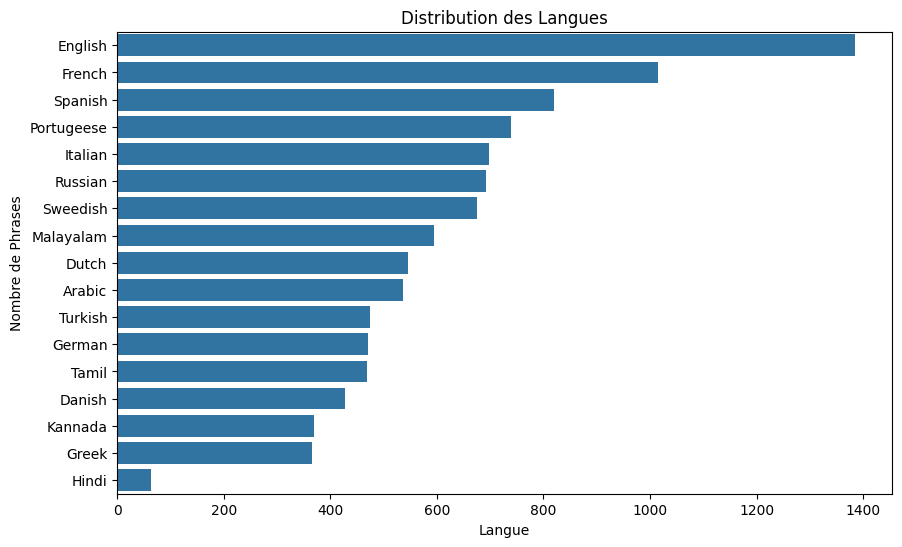

In [19]:
langue_counts = df["Language"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=langue_counts.values, y=langue_counts.index)
plt.xlabel("Langue")
plt.ylabel("Nombre de Phrases")
plt.title("Distribution des Langues")
plt.show()

## Partie III - Traduction du texte

Importation de la librairie de traduction

In [14]:
from googletrans import Translator, LANGUAGES
import json

Récupération de la class Translator()

In [15]:
translator = Translator()

Création d'une fonction pour la traduction

In [16]:
def translate_text(text, orig_language, dest_language):
    translation = translator.translate(text, src=orig_language, dest=dest_language)
    return translation.text

In [17]:
translated_text = translate_text("Привет, как дела", "ru", "fr")
print(translated_text)

Salut comment vas-tu


Récupération de la liste des langues

In [18]:
lang_code = {}
for lang in LANGUAGES:
    lang_code[LANGUAGES[lang]] = lang
lang_code    

{'afrikaans': 'af',
 'albanian': 'sq',
 'amharic': 'am',
 'arabic': 'ar',
 'armenian': 'hy',
 'azerbaijani': 'az',
 'basque': 'eu',
 'belarusian': 'be',
 'bengali': 'bn',
 'bosnian': 'bs',
 'bulgarian': 'bg',
 'catalan': 'ca',
 'cebuano': 'ceb',
 'chichewa': 'ny',
 'chinese (simplified)': 'zh-cn',
 'chinese (traditional)': 'zh-tw',
 'corsican': 'co',
 'croatian': 'hr',
 'czech': 'cs',
 'danish': 'da',
 'dutch': 'nl',
 'english': 'en',
 'esperanto': 'eo',
 'estonian': 'et',
 'filipino': 'tl',
 'finnish': 'fi',
 'french': 'fr',
 'frisian': 'fy',
 'galician': 'gl',
 'georgian': 'ka',
 'german': 'de',
 'greek': 'el',
 'gujarati': 'gu',
 'haitian creole': 'ht',
 'hausa': 'ha',
 'hawaiian': 'haw',
 'hebrew': 'he',
 'hindi': 'hi',
 'hmong': 'hmn',
 'hungarian': 'hu',
 'icelandic': 'is',
 'igbo': 'ig',
 'indonesian': 'id',
 'irish': 'ga',
 'italian': 'it',
 'japanese': 'ja',
 'javanese': 'jw',
 'kannada': 'kn',
 'kazakh': 'kk',
 'khmer': 'km',
 'korean': 'ko',
 'kurdish (kurmanji)': 'ku',
 'ky

Création d'un JSON depuis la liste des langues pour l'app streamlit

In [19]:
with open('lang_code.json', 'w') as f:
    json.dump(lang_code, f)